In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import gstlearn as gl
import gstlearn.plot as gp
import urllib.request

In [3]:
url = 'https://soft.minesparis.psl.eu/gstlearn/data/Scotland/Scotland_Temperatures.csv'
filecsv, head = urllib.request.urlretrieve(url)
datcsv = pd.read_csv(filecsv)
datcsv

,Longitude,Latitude,Elevation,January_temp
0,372.1,658.9,255,1.7
1,303.5,665.9,125,2
2,218.4,597.9,8,4.6
3,245.0,955.0,90,MISS
4,326.8,691.2,32,3.1
...,...,...,...,...
231,273.2,564.6,47,2.8
232,333.9,730.1,30,2.6
233,185.0,655.0,115,MISS
234,259.8,587.9,119,2.1


In [4]:
# Replace missing values and convert to numeric
datcsv["January_temp"].replace("MISS", np.nan, inplace=True)
datcsv = datcsv.astype("float64")

In [5]:
data = gl.Db()
data[list(datcsv.columns)] = datcsv
data.setLocators(["Longitude","Latitude"], gl.ELoc.X)
data.setLocator("January_temp", gl.ELoc.Z)
data


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 4
Maximum Number of UIDs       = 4
Total number of samples      = 236

Variables
---------
Column = 0 - Name = Longitude - Locator = x1
Column = 1 - Name = Latitude - Locator = x2
Column = 2 - Name = Elevation - Locator = NA
Column = 3 - Name = January_temp - Locator = z1

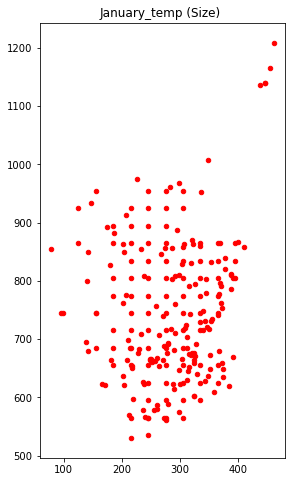

In [6]:
gp.plot(data)

In [7]:
grid = gl.DbGrid.createCoveringDb(data, [80,130], margin=[50,50])
grid


Data Base Grid Characteristics

Data Base Summary
-----------------
File is organized as a regular grid
Space dimension              = 2
Number of Columns            = 2
Maximum Number of UIDs       = 2
Total number of samples      = 10400

Grid characteristics:
---------------------
Origin :     28.200   480.400
Mesh   :      6.108     6.035
Number :         80       130

Variables
---------
Column = 0 - Name = x1 - Locator = x1
Column = 1 - Name = x2 - Locator = x2

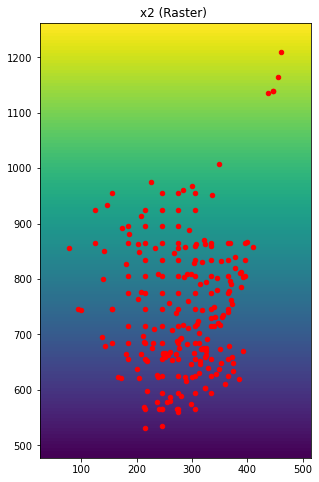

In [8]:
gp.plot(grid)
gp.symbol(data)

In [9]:
nmini = 1
nmaxi = 3
radius = 30
nsect = 1
neigh = gl.NeighMoving.create(False, nmaxi, radius, nmini, nsect)
neigh


Moving Neighborhood
Minimum number of samples           = 1
Maximum number of samples           = 3
Maximum horizontal distance         = 30

In [10]:
node = 4511
neigh.attach(data, grid)
ranks = neigh.select(node)
ranks # Only rank 143

array([143])

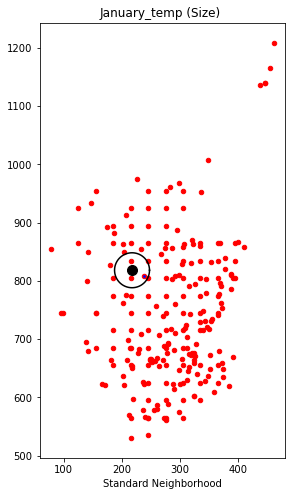

In [11]:
def show_neigh(data, grid, neigh, node, ranks):
  ax = data.plot()
  if (len(ranks) > 0):
    dataSel = data.clone()
    dataSel.addSelectionByRanks(ranks)
    ax = dataSel.plot(color='blue')
  ax.neigh(neigh, grid, node, flagCell=True)
  ax.decoration("Standard Neighborhood")
    
show_neigh(data, grid, neigh, node, ranks)

In [12]:
class BiTargetCheckMaxRadius(gl.ABiTargetCheck):
    def __init__(self, r):
        super(BiTargetCheckMaxRadius,self).__init__()
        self.r = r
        
    def isOK(self,st1,st2):
        return st1.getDistance(st2) < self.r
    
    def toString(self,strfmt):
        return "This is my Max Radius checker: {}".format(self.r)


In [13]:
nmini = 1
nmaxi = 3
# No more ellipsoid radius here
neigh2 = gl.NeighMoving.create(False, nmaxi=nmaxi, nmini=nmini)
# Prefer my own radius checker !
btc = BiTargetCheckMaxRadius(30)
neigh2.addBiTargetCheck(btc)
neigh2.display()


Moving Neighborhood
Minimum number of samples           = 1
Maximum number of samples           = 3
This is my Max Radius checker: 30 

In [14]:
node = 4511
neigh2.attach(data, grid)
ranks = neigh2.select(node)
ranks # Should return the same ranks than before

array([143])

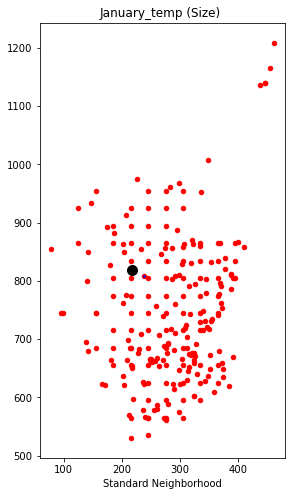

In [15]:
show_neigh(data, grid, neigh2, node, ranks)
# Here, the ellipsoid circle is not shown (because we don't use the default ellipsoid radius of NeighMoving)